# Mining Twitter

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://developer.twitter.com/en/apps and create a sample application. It is possible that Twitter no longer supports sandboxed applications and you may need to submit a request for permission to develop an app on Twitter.

There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="resources/ch01-twitter/images/Twitter-AppCredentials.png" width="600px">

If you are running this code on Binder or from the Docker container, you should just be able to execute the code in this notebook without any worries whatsoever about installing dependencies. If you are running the code from your own development envioronment, however, be advised that these examples in this chapter take advantage of a Python package called [twitter](https://github.com/sixohsix/twitter) to make API calls. You can install this package in a terminal with [pip](https://pypi.python.org/pypi/pip) with the command `pip install twitter`, preferably from within a [Python virtual environment](https://pypi.python.org/pypi/virtualenv). 

Once installed, you should be able to open up a Python interpreter (or better yet, your [IPython](http://ipython.org/) interpreter) and get rolling.

## Authorizing an application to access Twitter account data

In [1]:
import twitter
import os
from dotenv import load_dotenv

load_dotenv()

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")
OAUTH_TOKEN = os.getenv("ACCESS_TOKEN")
OAUTH_TOKEN_SECRET = os.getenv("ACCESS_TOKEN_SECRET")

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Retrieving trends

In [2]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': '#グラブル配布の日', 'url': 'http://twitter.com/search?q=%23%E3%82%B0%E3%83%A9%E3%83%96%E3%83%AB%E9%85%8D%E5%B8%83%E3%81%AE%E6%97%A5', 'promoted_content': None, 'query': '%23%E3%82%B0%E3%83%A9%E3%83%96%E3%83%AB%E9%85%8D%E5%B8%83%E3%81%AE%E6%97%A5', 'tweet_volume': 25724}, {'name': 'コースト', 'url': 'http://twitter.com/search?q=%E3%82%B3%E3%83%BC%E3%82%B9%E3%83%88', 'promoted_content': None, 'query': '%E3%82%B3%E3%83%BC%E3%82%B9%E3%83%88', 'tweet_volume': 10822}, {'name': 'HAPPY BIRTHDAY DREAM', 'url': 'http://twitter.com/search?q=%22HAPPY+BIRTHDAY+DREAM%22', 'promoted_content': None, 'query': '%22HAPPY+BIRTHDAY+DREAM%22', 'tweet_volume': 107439}, {'name': 'Nacho', 'url': 'http://twitter.com/search?q=Nacho', 'promoted_content': None, 'query': 'Nacho', 'tweet_volume': 63721}, {'name': 'STUDIO COAST', 'url': 'http://twitter.com/search?q=%22STUDIO+COAST%22', 'promoted_content': None, 'query': '%22STUDIO+COAST%22', 'tweet_volume': 40907}, {'name': 'SCP財団', 'url': 'http://twitter.

In [3]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#グラブル配布の日
コースト
HAPPY BIRTHDAY DREAM
Nacho
STUDIO COAST
SCP財団
#ワイドスクランブル
ageHa
River
#カマージャンボ
#香取慎吾
CHARLIE SLIMECICLE
#VotaçãoNaIlha
ガンダム
ライブハウス
Trans
Twitterくん
Flamengo
学校のプール
フォント
HAPPY BIRTHDAY CHARLIE
Zepp Tokyo
Ozzie
McBride
ダークモード
calum
Braves
Hunter Biden
Arrascaeta
広島県と市
塩野くん
CHAEYOUNG
Pon De Beach
Lali
IOCと組織委
バッハ氏の広島訪問警備費負担
全額折半
ノーゲーム
업데이트
Carrascal
フォロー中
Mineiro
バーベキュー後
行為の代償
Will Smith
Gallardo
Twitterアプデ
大下さん
思い出の場所
TwitterのUI


In [4]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

HAPPY BIRTHDAY DREAM
CHARLIE SLIMECICLE
Trans
Ozzie
#AEWDynamite
#RonaRon
#BETPresentsTheEncore
#RHOBH
McBride
HAPPY BIRTHDAY CHARLIE
Hunter Biden
Will Smith
#ForTheA
Votto
Corbin Burnes
Arnold
callahan
The Delta Variant
Bellinger
Lucas Sims
Kiely
calum
Black Thought
Adam Wainwright
DREAM DAY
Andre 3000
Waino
Miggy
Givens
Bohm
Erika
Garcelle
Gausman
HOUSE MEETING
Dante Martin
Rinna
HAPPY BDAY DREAM
Ernie Johnson
Sutton
all out
Quickley
LA Confidential
HAPPY BIRTHDAY SLIMECICLE
Antonov
Shamari
Snit
My Fall
Jed Lowrie
Master and Commander
Rodriguez


In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Trans', 'Hunter Biden', 'Will Smith', 'Ozzie', 'McBride', 'HAPPY BIRTHDAY DREAM', 'CHARLIE SLIMECICLE', 'calum', 'HAPPY BIRTHDAY CHARLIE'}


## Anatomy of a Tweet

In [6]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#MothersDay' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Thu Aug 12 04:20:02 +0000 2021",
 "id": 1425673407199334410,
 "id_str": "1425673407199334410",
 "text": "RT @SivakornLert: \u2764\u2764\u2764\n.\n.\n#mothersday https://t.co/7FzTtFqo5e",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "mothersday",
    "indices": [
     26,
     37
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "SivakornLert",
    "name": "sivakorn lert",
    "id": 4776410300,
    "id_str": "4776410300",
    "indices": [
     3,
     16
    ]
   }
  ],
  "urls": [],
  "media": [
   {
    "id": 1425649075551014912,
    "id_str": "1425649075551014912",
    "indices": [
     38,
     61
    ],
    "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/1425649075551014912/pu/img/t_hS3yCMS8ji7Vur.jpg",
    "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/1425649075551014912/pu/img/

In [7]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @SivakornLert: ❤❤❤
.
.
#mothersday https://t.co/7FzTtFqo5e
Favorites:  0
Retweets:  38

RT @bittoonfunny: Happy Mother’s Day
#MothersDay https://t.co/QPBpY5UEmf
Favorites:  0
Retweets:  29

เพลงดีๆ ประจำวันนี้
👉 https://t.co/wdtZ2Bsnt2

#น้ำใจแม่ #วันแม่2564 #วันแม่
#สุขสันต์วันแม่
#วันแม่แห่งชาติ… https://t.co/AlIpeJbxgr
Favorites:  0
Retweets:  0

RT @akshaykumar: Maa warga koi nahi #MothersDay https://t.co/OxFdIhT80V
Favorites:  0
Retweets:  3270

RT @_ntkkwstoru: 𝐇𝐚𝐩𝐩𝐲 𝐌𝐨𝐭𝐡𝐞𝐫’𝐬 𝐃𝐚𝐲 ♡
สุขสันต์วันแม่ค่ะ 
ขอบคุณคุณแม่ที่เลี้ยงโทโท
มาได้น่ารักขนาดนี้ 🐻‍❄️✨
ขอให้คุณแม่มีสุขภาพร่างกายแข็งแ…
Favorites:  0
Retweets:  10

RT @ArorajArvind: Belive in yourself 👍#arvindaroraquotes #arvindarora #amazingquotes #motherhood #mothersday #dailyquotes #dailywatch #dail…
Favorites:  0
Retweets:  8

RT @Noowaan6: @Feel48021987 😂😂 หนูขำแม่  รักลูกมาก.....💞
สุขสันต์วันแม่นะคะคุณแม่
ขอให้สุขภาพแข็งแรง
เป็นนางฟ้า ที่แสนสวยตลอดไปค่ะ
#Mothers…
Favorites:  0
Retweets:  4

แม่ ผู้ที่เชื่อในความเป็นไปได้ของ

## Extracting text, screen names, and hashtags from tweets

In [8]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @SivakornLert: \u2764\u2764\u2764\n.\n.\n#mothersday https://t.co/7FzTtFqo5e",
 "RT @bittoonfunny: Happy Mother\u2019s Day\n#MothersDay https://t.co/QPBpY5UEmf",
 "\u0e40\u0e1e\u0e25\u0e07\u0e14\u0e35\u0e46 \u0e1b\u0e23\u0e30\u0e08\u0e33\u0e27\u0e31\u0e19\u0e19\u0e35\u0e49\n\ud83d\udc49 https://t.co/wdtZ2Bsnt2\n\n#\u0e19\u0e49\u0e33\u0e43\u0e08\u0e41\u0e21\u0e48 #\u0e27\u0e31\u0e19\u0e41\u0e21\u0e482564 #\u0e27\u0e31\u0e19\u0e41\u0e21\u0e48\n#\u0e2a\u0e38\u0e02\u0e2a\u0e31\u0e19\u0e15\u0e4c\u0e27\u0e31\u0e19\u0e41\u0e21\u0e48\n#\u0e27\u0e31\u0e19\u0e41\u0e21\u0e48\u0e41\u0e2b\u0e48\u0e07\u0e0a\u0e32\u0e15\u0e34\u2026 https://t.co/AlIpeJbxgr",
 "RT @akshaykumar: Maa warga koi nahi #MothersDay https://t.co/OxFdIhT80V",
 "RT @_ntkkwstoru: \ud835\udc07\ud835\udc1a\ud835\udc29\ud835\udc29\ud835\udc32 \ud835\udc0c\ud835\udc28\ud835\udc2d\ud835\udc21\ud835\udc1e\ud835\udc2b\u2019\ud835\udc2c \ud835\udc03\ud835\udc1a\ud835\udc32 \u2661\n\u0e2a\u0e38\u0e02\u0e2a\u0e31\u0e19\u0e15\u0e4c\u

## Creating a basic frequency distribution from the words in tweets

In [9]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 375), ('#MothersDay', 128), ('#mothersday', 101), ('Morning', 98), ('to', 98), ('Kem', 96), ('#เข้มหัสวีร์', 92), ('@Suchadaaa24:', 89), ('Day', 83), ('.', 82)]

[('Suchadaaa24', 93), ('SivakornLert', 32), ('ArorajArvind', 31), ('Noowaan6', 24), ('bittoonfunny', 21), ('Kan561111', 15), ('bkkmenu', 14), ('DNew40906675', 11), ('Suescuriosities', 11), ('_ntkkwstoru', 10)]

[('MothersDay', 138), ('mothersday', 102), ('เข้มหัสวีร์', 96), ('วันแม่2564', 48), ('วันแม่', 48), ('น้ำใจแม่', 41), ('motherhood', 36), ('สุขสันต์วันแม่', 35), ('MothersDay2021', 34), ('arvindaroraquotes', 33)]



## Using prettytable to display tuples in a nice tabular format

In [10]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------------+-------+
| Word          | Count |
+---------------+-------+
| RT            |   375 |
| #MothersDay   |   128 |
| #mothersday   |   101 |
| Morning       |    98 |
| to            |    98 |
| Kem           |    96 |
| #เข้มหัสวีร์      |    92 |
| @Suchadaaa24: |    89 |
| Day           |    83 |
| .             |    82 |
+---------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| Suchadaaa24     |    93 |
| SivakornLert    |    32 |
| ArorajArvind    |    31 |
| Noowaan6        |    24 |
| bittoonfunny    |    21 |
| Kan561111       |    15 |
| bkkmenu         |    14 |
| DNew40906675    |    11 |
| Suescuriosities |    11 |
| _ntkkwstoru     |    10 |
+-----------------+-------+
+-------------------+-------+
| Hashtag           | Count |
+-------------------+-------+
| MothersDay        |   138 |
| mothersday        |   102 |
| เข้มหัสวีร์           |    96 |
| วันแม่2564          |    48 |
| วันแม่              | 

## Calculating lexical diversity for tweets

In [11]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3132718055375016
0.26558891454965355
0.21805555555555556
12.821666666666667


## Finding the most popular retweets

In [12]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+--------------+---------------------+----------------------------------------------------+
| Count | Screen Name  | Tweet ID            | Text                                               |
+-------+--------------+---------------------+----------------------------------------------------+
| 4550  | insan_honey  | 1259296791679426562 | RT @insan_honey: Only one woman is the best in the |
|       |              |                     | world and whom I love the most, she is my MOTHER.… |
| 3550  | mkstalin     | 1391254816010035200 | RT @mkstalin: 'தாய்'மொழி, 'தாய்'நாடு என நம்           |
|       |              |                     | வாழ்வின் எல்லா நிலையிலும் உயர்ந்து                       |
|       |              |                     | நிறைந்திருப்பவர் தாய். பத்து மாதம் சுமந்து,               |
|       |              |                     | சீராட்டி வளர்த்த…                                      |
| 3520  | Emy_san_arts | 1127475464916881408 | RT @Emy_san_arts: "Hello, mom."  

## Looking up users who have retweeted a status

In [13]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

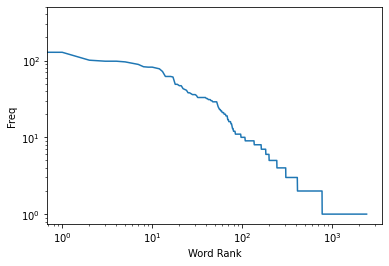

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

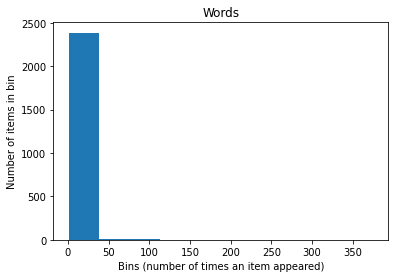

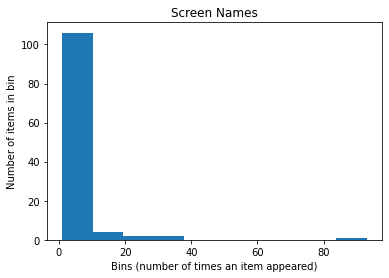

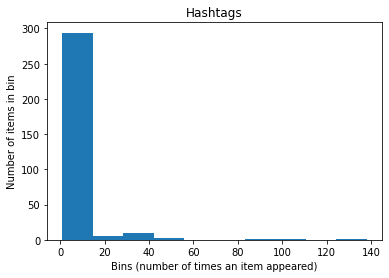

<Figure size 432x288 with 0 Axes>

In [15]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

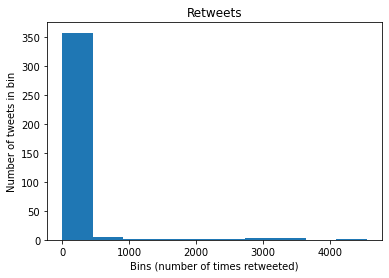

In [16]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

## Sentiment Analysis

In [17]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/shane/nltk_data...


In [18]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [19]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [20]:
analyzer = SentimentIntensityAnalyzer()

In [21]:
analyzer.polarity_scores('Hello')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [22]:
analyzer.polarity_scores('I really enjoy this video series.')

{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5413}

In [23]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.64}

In [24]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.7271}

In [25]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.6627}

In [26]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [27]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [28]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.905 : "RT @Dream: thank you for all the birthday wishes 🥺 I love and appreciate all of uuuuuu❤️❤️❤️

and I have to... IM FEELING tWENTY TWOOOOO 😎"


In [29]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.832 : "RT @silentevils: every killer on dbd today is proving to me that they don’t wash their ass"
